In [10]:
cd ..

/home/araxal


In [11]:
import numpy as np
import torch
from torch import nn
from utils.genre_classification import evaluate, executor, feature_preparator
from utils.genre_classification.random_features_slicer import random_features_slicer
from utils.genre_classification.plot_metrics import plot_metrics
from models.genre_classification.FeedForwardModel import FeedForwardModel
from utils.genre_classification.plot_confusion_matrix import plot_confusion_matrix

In [12]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [13]:
BATCH_SIZE = 64
NUM_CLASSES = 8
DEVICE = torch.device('cuda')

In [14]:
%%time
train_data_loader, val_data_loader, test_data_loader, idx_to_label = feature_preparator(
    'features/genre_classification/mfcc24-zcr-sc-sr-sf-chr.p',
    BATCH_SIZE,
    transform=random_features_slicer,
    normalize=True
)

def transform_idx_to_label(x):
    return idx_to_label[x]

FileNotFoundError: [Errno 2] No such file or directory: 'features/genre_classification/mfcc24-zcr-sc-sr-sf-chr.p'

In [15]:
next(iter(train_data_loader))[0].shape

torch.Size([64, 256, 40])

In [16]:
train_labels = []
val_labels = []
test_labels = []

for x, label in train_data_loader:
    train_labels.append(label)

for x, label in val_data_loader:
    val_labels.append(label)

for x, label in test_data_loader:
    test_labels.append(label)

print('Train', np.unique(torch.cat(train_labels).numpy(), return_counts=True))
print('Val', np.unique(torch.cat(val_labels).numpy(), return_counts=True))
print('Test', np.unique(torch.cat(test_labels).numpy(), return_counts=True))
print(idx_to_label)

Train (array([0, 1, 2, 3, 4, 5, 6, 7]), array([1167, 1178, 1175, 1158, 1170, 1177, 1100, 1155]))
Val (array([0, 1, 2, 3, 4, 5, 6, 7]), array([249, 251, 251, 248, 250, 252, 236, 247]))
Test (array([0, 1, 2, 3, 4, 5, 6, 7]), array([249, 254, 250, 248, 252, 251, 235, 245]))
{0: 'Blues', 1: 'Classical', 2: 'Electronic', 3: 'Folk', 4: 'Hip-Hop', 5: 'Jazz', 6: 'Pop', 7: 'Rock'}


## Перцептрон

 61%|██████    | 61/100 [01:28<00:56,  1.44s/it]

Early stop!


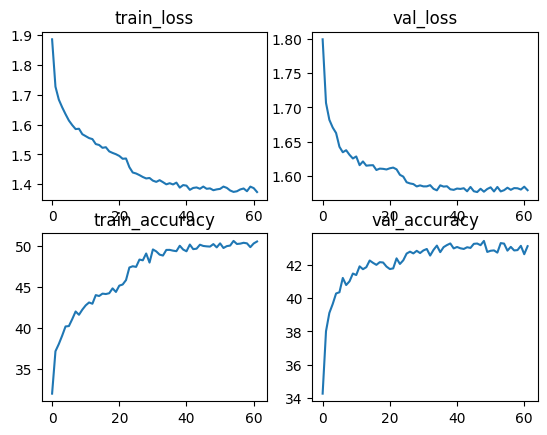

In [17]:
ff_simple_model = FeedForwardModel(256 * 40, NUM_CLASSES).to(DEVICE)
train_progress, val_progress = executor(DEVICE, ff_simple_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(15,  0.001))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.47      0.43      0.45       249
   Classical       0.59      0.68      0.63       252
  Electronic       0.35      0.35      0.35       251
        Folk       0.35      0.38      0.36       249
     Hip-Hop       0.47      0.57      0.51       248
        Jazz       0.36      0.40      0.38       252
         Pop       0.34      0.17      0.23       236
        Rock       0.42      0.40      0.41       247

    accuracy                           0.43      1984
   macro avg       0.42      0.42      0.42      1984
weighted avg       0.42      0.43      0.42      1984



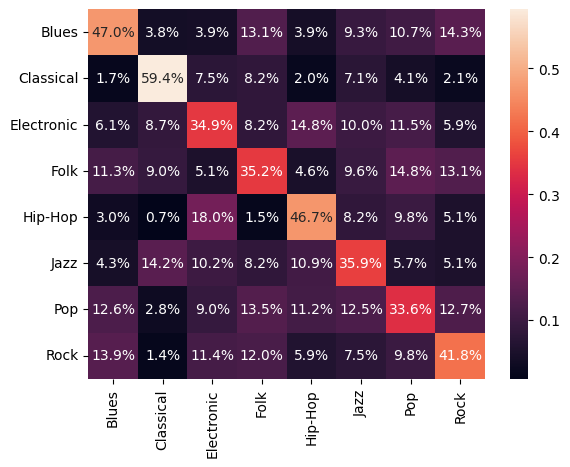

In [18]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, ff_simple_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

## Свертка по времени

 58%|█████▊    | 58/100 [02:47<02:00,  2.88s/it]

Early stop!


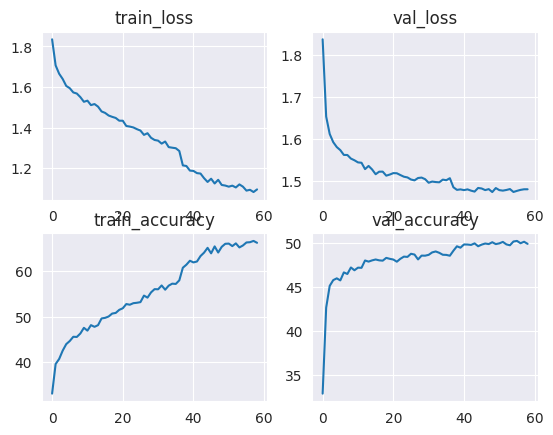

In [27]:
from models.genre_classification.Conv1Model import Conv1Model

conv_1_model = Conv1Model(NUM_CLASSES, time_size=256, feature_size=40).to(DEVICE)
train_progress, val_progress = executor(DEVICE, conv_1_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(15,  0.01))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.59      0.50      0.54       246
   Classical       0.65      0.74      0.69       252
  Electronic       0.41      0.39      0.40       251
        Folk       0.40      0.42      0.41       249
     Hip-Hop       0.61      0.67      0.64       251
        Jazz       0.44      0.47      0.45       253
         Pop       0.32      0.26      0.29       235
        Rock       0.44      0.45      0.45       247

    accuracy                           0.49      1984
   macro avg       0.48      0.49      0.48      1984
weighted avg       0.48      0.49      0.49      1984



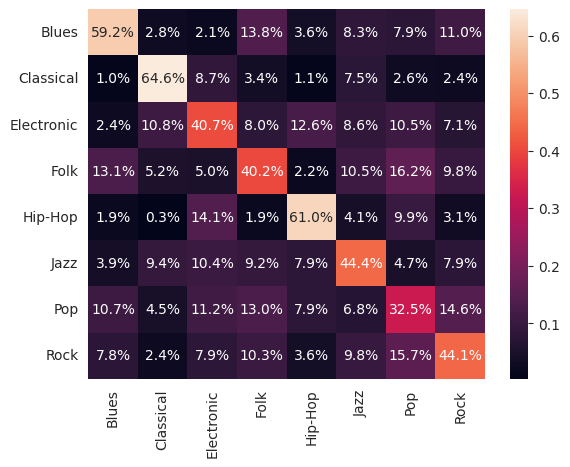

In [28]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, conv_1_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

## Свертка по фичам

 61%|██████    | 61/100 [02:30<01:36,  2.47s/it]

Early stop!


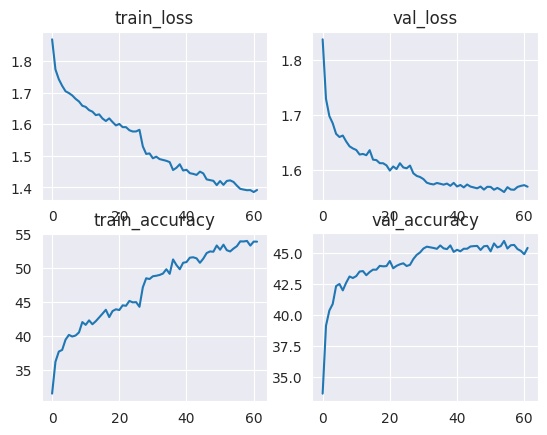

In [30]:
from models.genre_classification.Conv2Model import Conv2Model

conv_2_model = Conv2Model(NUM_CLASSES, 40, 256, n_conv_layers=2).to(DEVICE)
train_progress, val_progress = executor(DEVICE, conv_2_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(15,  0.01))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.58      0.47      0.52       249
   Classical       0.65      0.72      0.69       254
  Electronic       0.32      0.34      0.33       250
        Folk       0.38      0.37      0.37       248
     Hip-Hop       0.53      0.62      0.57       251
        Jazz       0.37      0.40      0.38       251
         Pop       0.29      0.25      0.27       234
        Rock       0.47      0.44      0.45       247

    accuracy                           0.45      1984
   macro avg       0.45      0.45      0.45      1984
weighted avg       0.45      0.45      0.45      1984



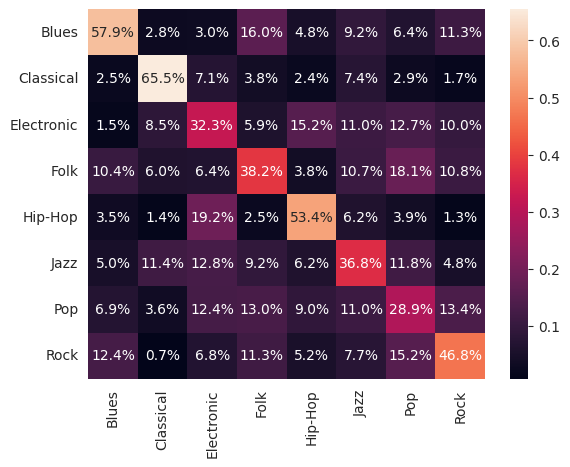

In [31]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, conv_2_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

## LSTM

 33%|███▎      | 33/100 [01:13<02:28,  2.21s/it]

Early stop!


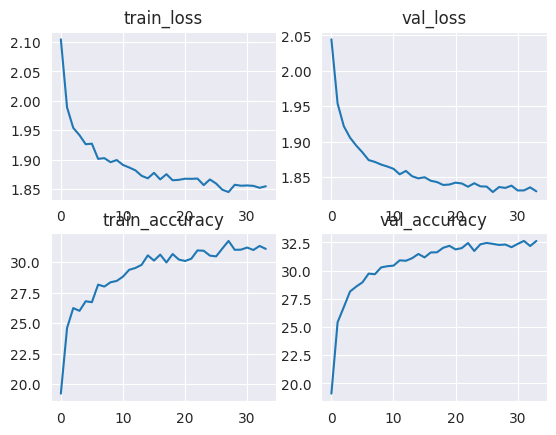

In [39]:
from models.genre_classification.LSTMModel import LSTMModel

lstm_simple_model = LSTMModel(40, 256, NUM_CLASSES).to(DEVICE)
train_progress, val_progress = executor(DEVICE, lstm_simple_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(15,  0.01))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.38      0.29      0.33       249
   Classical       0.47      0.68      0.56       254
  Electronic       0.25      0.20      0.22       251
        Folk       0.26      0.25      0.26       245
     Hip-Hop       0.31      0.42      0.36       252
        Jazz       0.28      0.31      0.29       252
         Pop       0.24      0.05      0.08       234
        Rock       0.33      0.44      0.38       247

    accuracy                           0.33      1984
   macro avg       0.31      0.33      0.31      1984
weighted avg       0.32      0.33      0.31      1984



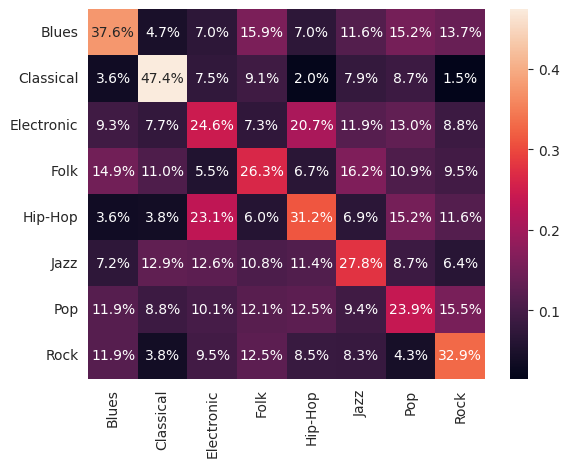

In [43]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, lstm_simple_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

## Свертка по времени и фичам

 61%|██████    | 61/100 [03:09<02:01,  3.10s/it]

Early stop!


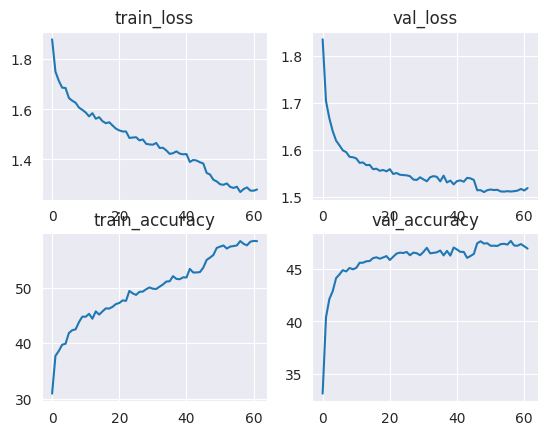

In [34]:
from models.genre_classification.Conv3Model import Conv3Model

conv_3_model = Conv3Model(NUM_CLASSES, 256, 40, n_conv_layers=2).to(DEVICE)
train_progress, val_progress = executor(DEVICE, conv_3_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(15,  0.01))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.58      0.47      0.52       249
   Classical       0.61      0.74      0.67       253
  Electronic       0.40      0.38      0.39       250
        Folk       0.39      0.40      0.39       247
     Hip-Hop       0.57      0.68      0.62       251
        Jazz       0.39      0.40      0.40       251
         Pop       0.37      0.31      0.33       236
        Rock       0.50      0.46      0.48       247

    accuracy                           0.48      1984
   macro avg       0.48      0.48      0.48      1984
weighted avg       0.48      0.48      0.48      1984



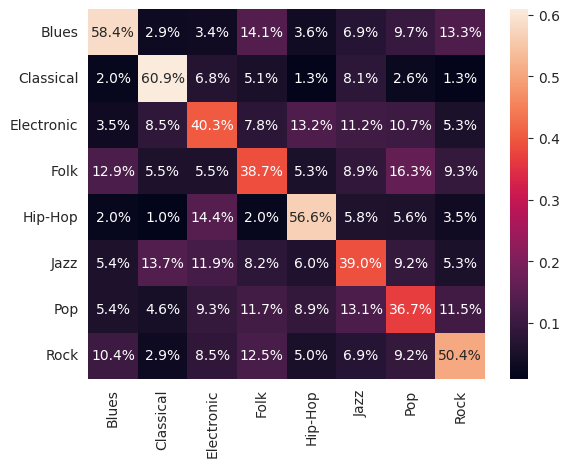

In [35]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, conv_3_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

## CRNN

 39%|███▉      | 39/100 [02:00<03:08,  3.08s/it]

Early stop!


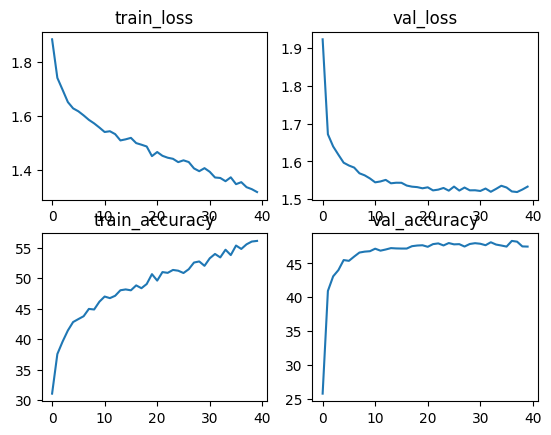

In [23]:
from models.genre_classification.CRNNModel import CRNNModel

crnn_model = CRNNModel(256, 40, NUM_CLASSES).to(DEVICE)
train_progress, val_progress = executor(DEVICE, crnn_model, train_dataloader = train_data_loader, val_dataloader=val_data_loader, epochs=100, learning_rate=0.0001, weight_decay=0.01, evaluate_per_iteration=10, early_stop_after=(15,  0.01))

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.48      0.49      0.48       249
   Classical       0.60      0.76      0.67       252
  Electronic       0.38      0.43      0.40       251
        Folk       0.40      0.35      0.37       248
     Hip-Hop       0.67      0.64      0.65       251
        Jazz       0.40      0.46      0.43       252
         Pop       0.30      0.20      0.24       234
        Rock       0.49      0.47      0.48       247

    accuracy                           0.48      1984
   macro avg       0.47      0.47      0.47      1984
weighted avg       0.47      0.48      0.47      1984



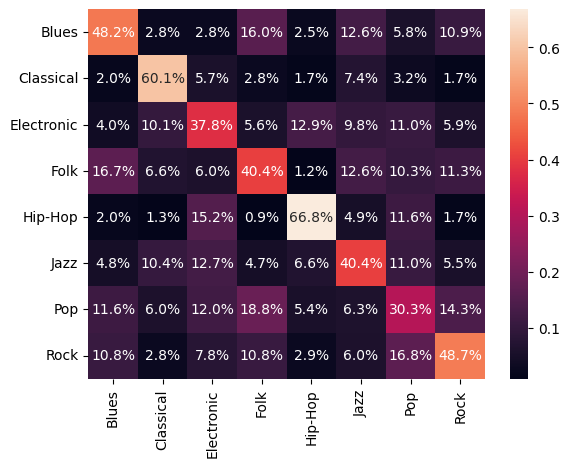

In [25]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, crnn_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)

## Трансформер

  1%|          | 1/100 [00:12<20:02, 12.15s/it]

2.01834298331162 2.0167155146171543


  2%|▏         | 2/100 [00:24<19:42, 12.07s/it]

1.892613776798906 1.8880448768643068


  3%|▎         | 3/100 [00:36<19:31, 12.08s/it]

1.8625219377978095 1.8571074214032899


  4%|▍         | 4/100 [00:48<19:18, 12.07s/it]

1.8479237104284352 1.8505033015350287


  5%|▌         | 5/100 [01:00<19:11, 12.12s/it]

1.837448372512028 1.8416044383066104


  6%|▌         | 6/100 [01:12<19:00, 12.13s/it]

1.834545376383025 1.8361957957667687


  7%|▋         | 7/100 [01:25<19:19, 12.47s/it]

1.8341350637633225 1.8350162651376485


  8%|▊         | 8/100 [01:37<18:41, 12.19s/it]

1.833147956585062 1.8310424499614264


  9%|▉         | 9/100 [01:48<18:07, 11.95s/it]

1.8262835593059146 1.8292731585041169


 10%|█         | 10/100 [02:00<17:41, 11.79s/it]

1.8308811557704006 1.8291516838107913


 11%|█         | 11/100 [02:11<17:21, 11.70s/it]

1.8277448374649574 1.829334921307034


 12%|█▏        | 12/100 [02:23<17:19, 11.82s/it]

1.8267848409455398 1.8255979728527822


 13%|█▎        | 13/100 [02:35<17:00, 11.73s/it]

1.8289814085795961 1.8302533374465066


 14%|█▍        | 14/100 [02:46<16:41, 11.64s/it]

1.8286667560708934 1.8284315165653022


 15%|█▌        | 15/100 [02:58<16:24, 11.58s/it]

1.8349447085939605 1.8328355999403105


 16%|█▌        | 16/100 [03:09<16:08, 11.53s/it]

1.8351377429633304 1.8324717783158821


 17%|█▋        | 17/100 [03:21<15:54, 11.50s/it]

1.8334900025663705 1.8307849194413872


 18%|█▊        | 18/100 [03:32<15:43, 11.50s/it]

1.8364191745889598 1.8343926625439773


 19%|█▉        | 19/100 [03:44<15:31, 11.50s/it]

1.8352516741588198 1.8344974440913049


 20%|██        | 20/100 [03:56<15:39, 11.74s/it]

1.835280862347833 1.8351345314347185


 21%|██        | 21/100 [04:08<15:32, 11.80s/it]

1.8365441346990652 1.8347291638774257


 22%|██▏       | 22/100 [04:22<16:04, 12.37s/it]

1.8334074184812348 1.8347871786377337


 22%|██▏       | 22/100 [04:34<16:12, 12.46s/it]

1.835900305057394 1.8344256117352447
Early stop!


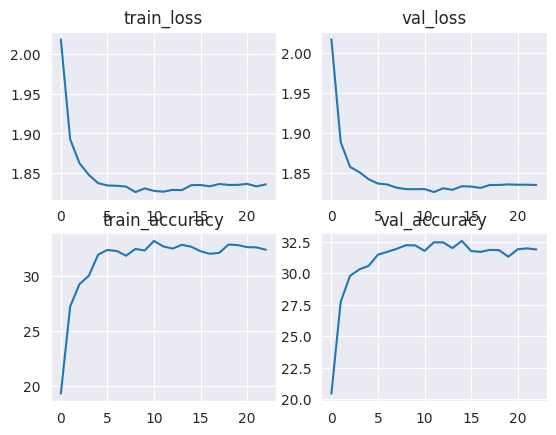

In [7]:
from models.genre_classification.TransformerModel import TransformerModel

transformer_model = TransformerModel(
    input_dim=40,
    num_layers=6,
    output_dim=NUM_CLASSES,
    num_heads=16,
    dropout=0.1,
    hidden_dim=256
).to(DEVICE)
train_progress, val_progress = executor(
    DEVICE,
    transformer_model,
    train_dataloader = train_data_loader,
    val_dataloader=val_data_loader,
    epochs=100,
    learning_rate=0.0001,
    weight_decay=0.1,
    evaluate_per_iteration=15,
    early_stop_after=(15,  0.01),
    print_metrics=True
)

plot_metrics(train_progress, val_progress, metrics = ['loss', 'accuracy'])

              precision    recall  f1-score   support

       Blues       0.29      0.31      0.30       246
   Classical       0.39      0.73      0.51       252
  Electronic       0.22      0.20      0.21       252
        Folk       0.22      0.16      0.19       247
     Hip-Hop       0.33      0.54      0.41       251
        Jazz       0.22      0.08      0.12       252
         Pop       0.29      0.02      0.03       236
        Rock       0.33      0.42      0.37       248

    accuracy                           0.31      1984
   macro avg       0.29      0.31      0.27      1984
weighted avg       0.29      0.31      0.27      1984



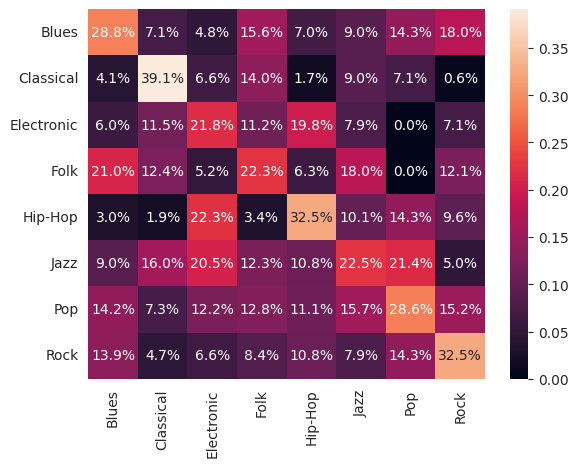

In [8]:
test_loss, test_accuracy, (test_pred, test_true) = evaluate(DEVICE, transformer_model, test_data_loader, criterion=nn.CrossEntropyLoss(), return_pred=True)

plot_confusion_matrix(test_true, test_pred, idx_to_label, transform_idx_to_label)